In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.model_selection import train_test_split

In [1]:
# import tensorflow.compat.v2 as tf
# import tensorflow_datasets as tfds

# tf.enable_v2_behavior()

# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

# from tensorflow.python.compiler.mlcompute import mlcompute
# mlcompute.set_mlc_device(device_name='any')

In [2]:
# from tensorflow.compat.v2.keras import layers
# from tensorflow.compat.v2.keras import losses
# from tensorflow.compat.v2.keras import preprocessing
# from tensorflow.compat.v2.keras.layers.experimental.preprocessing import TextVectorization
# import pandas as pd
# from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
np.version.version

'1.19.5'

In [5]:
# !python - version

# try RNN

In [3]:
df = pd.read_csv('train.csv', dtype =object,  usecols= ['id', 'text', 'target'])
df['target'] = df['target'].astype(float)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=10)
# target = df.pop('target')

In [4]:
vocab_size = 10000
embedding_dim = 16

max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df_train['text'])
word_index = tokenizer.word_index

# use index method 

# they are two methods here: use text to sequences, then use embedding layer to create the word embedding; 
# or directly convert each document to a vector
training_sequences = tokenizer.texts_to_sequences(df_train['text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(df_test['text'])
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# training_vectors = tokenizer.texts_to_matrix(df_train['text'], mode='binary')
# # training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type)
# testing_vectors = tokenizer.texts_to_sequences(df_test['text'], mode = 'binary')
# # testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


# this still may be converted to a vectorization layer

In [5]:
training_padded

array([[   0,    0,    0, ...,   21, 1169, 2065],
       [   0,    0,    0, ...,    3, 6010, 6011],
       [   0,    0,    0, ...,    2,    3, 6012],
       ...,
       [   0,    0,    0, ...,  987,  938, 1049],
       [   0,    0,    0, ...,    2,    3,    1],
       [   0,    0,    0, ...,    2,    3,    1]], dtype=int32)

In [6]:
print('embedding_dim:' +  str(embedding_dim))
print('embedding_dim:' +  str(max_length))

embedding_dim:16
embedding_dim:120


In [10]:
# model=tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
#     tf.keras.layers.LSTM(embedding_dim),
# #     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    
#     tf.keras.layers.Dense(24, activation ='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])


In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.4)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.4)),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# optimizer = tf.keras.optimizers.Adam(lr=0.0001)
optimizer = tf.keras.optimizers.Adam(lr=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)
# what is the beta_1 and beta_2? 

# optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Precision(), 
                                                                   tf.keras.metrics.Recall()])
model.summary()

# how to add in precision and recall? 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 120, 32)           4224      
_________________________________________________________________
bidirectional_7 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 170,701
Trainable params: 170,701
Non-trainable params: 0
_________________________________________________________________


In [20]:
import numpy
numpy.version.version

'1.19.5'

In [21]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# model = tf.keras.Sequential([tf.keras.layers.Input(10000,),
# #     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # optimizer = tf.keras.optimizers.Adam(lr=0.001)
# optimizer = tf.keras.optimizers.Adam()
# model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Precision(), 
#                                                                    tf.keras.metrics.Recall()])
# model.summary()

In [32]:
num_epochs = 50
history = model.fit(training_padded, df_train['target'], epochs=num_epochs, validation_data=(testing_padded, df_test['target']),
                   callbacks=[callback])

Epoch 1/50
191/191 [==============================] - 39s 190ms/step - loss: 0.6928 - accuracy: 0.5480 - precision_3: 0.4484 - recall_3: 0.2067 - val_loss: 0.6922 - val_accuracy: 0.5653 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/50
191/191 [==============================] - 35s 185ms/step - loss: 0.6920 - accuracy: 0.5694 - precision_3: 0.3474 - recall_3: 0.0018 - val_loss: 0.6916 - val_accuracy: 0.5653 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/50
191/191 [==============================] - 36s 187ms/step - loss: 0.6914 - accuracy: 0.5693 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6909 - val_accuracy: 0.5653 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/50
191/191 [==============================] - 36s 186ms/step - loss: 0.6904 - accuracy: 0.5769 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.6902 - val_accuracy: 0.5653 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 5/50
1

In [23]:
# continue from here 

In [24]:
test_target_pred = (model.predict(testing_padded) > 0.5).astype(int)
# test_target_pred_class = model.predict_classes(testing_padded)

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

print('accuracy: ' + str(accuracy_score(y_pred=test_target_pred, y_true=df_test['target'])))
print('precision: ' +  str(precision_score(y_pred=test_target_pred, y_true=df_test['target'])))
print('recall: ' + str(recall_score(y_pred=test_target_pred, y_true=df_test['target'])))
print('f1: ' +  str(f1_score(y_pred=test_target_pred, y_true=df_test['target'])))
print('auc: ' +  str(roc_auc_score(y_score=test_target_pred, y_true=df_test['target'])))


accuracy: 0.7793827971109653
precision: 0.784965034965035
recall: 0.6782477341389728
f1: 0.7277147487844408
auc: 0.767695295640915


In [26]:
model.metrics_names

['loss', 'accuracy', 'precision_2', 'recall_2']

In [27]:
loss, accuracy, precision, recall = model.evaluate(x=testing_padded, y = df_test['target'])

print("Loss: ", loss)
print("Accuracy: ", accuracy)
print('precision: ', precision)
print('recall: ', recall)


48/48 [==============================] - 1s 23ms/step - loss: 0.6789 - accuracy: 0.7794 - precision_2: 0.7850 - recall_2: 0.6782
Loss:  0.6789055466651917
Accuracy:  0.7793828248977661
precision:  0.7849650382995605
recall:  0.6782477498054504


In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_precision_2', 'val_recall_2'])

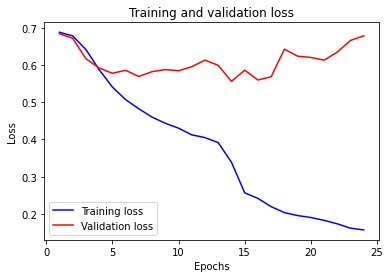

In [29]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

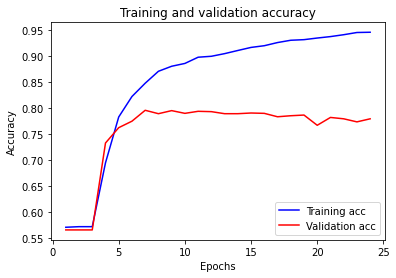

In [30]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# for ele, text in ds_test_raw.take(-1):
#     print(ele)

# t = ds_test_raw.map(lambda x, y: x.numpy())